<a href="https://colab.research.google.com/github/sulthannauval/MachineLearning-Course/blob/main/Tugas-Minggu-9/9_Regression_Case_Sulthan_110321305.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Lecture 9 - Regression Case - housing.csv

---

*   Sulthan Nauval Abdillah
*   1103213065
*   Link ChatGPT : [link text](https://chatgpt.com/share/2d371f70-60d1-4d2d-9cbe-f04264a2125f)

## Install Library

In [10]:
!pip install pandas numpy scikit-learn tensorflow matplotlib

## Import Library

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

## Read Dataset

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/housing.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


## Pre-Processing

In [12]:
# Separate features and target
X = df.drop(columns=['AboveMedianPrice'])
y = df['AboveMedianPrice']

In [13]:
# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

## Training Model

In [14]:
# Split data into 70% train and 30% validation+test
X_train, X_val_test, y_train, y_val_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [15]:
# Split validation+test data into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [16]:
# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.6792 - accuracy: 0.5264 - val_loss: 0.6731 - val_accuracy: 0.5434
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.5264 - val_loss: 0.6675 - val_accuracy: 0.5297
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.5176 - val_loss: 0.6627 - val_accuracy: 0.5297
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.5225 - val_loss: 0.6581 - val_accuracy: 0.5297
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6598 - accuracy: 0.5294 - val_loss: 0.6535 - val_accuracy: 0.5342
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.5450 - val_loss: 0.6488 - val_accuracy: 0.5845
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.5861 - val_loss: 0.6439 - val_accuracy: 0.6667
Epoch 8/100


## Evaluate Model

In [18]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

7/7 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.9041
Test accuracy: 0.9041095972061157


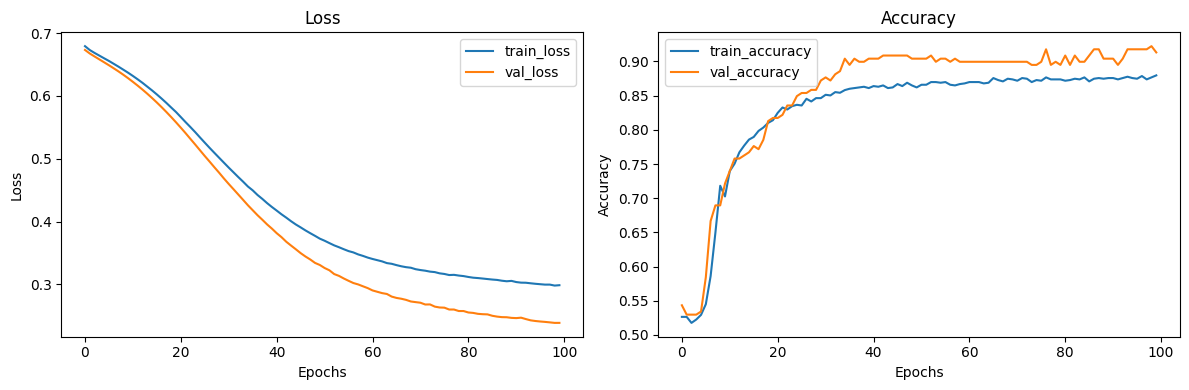

In [20]:
# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()